Exploring Simple Mathematical Functions with NumPy & Matplotlib

This notebook demonstrates how to:

1. Create a uniformly spaced 1‑D grid.  
2. Plot elementary functions (quadratic, sinusoid, Gaussian).  
3. Estimate the mean and standard deviation of a Gaussian directly from the sampled data.  
4. Generate random samples from a normal distribution and visualise them with a histogram.  

**Author:** Rachel Migdal – 11 September 2025

1)  Set Up the Environment

Import the required packages and configure a simple plotting style.

In [3]:
import numpy as np
import matplotlib.pyplot as plt


2) Build a 1‑D Spatial Grid
* `dx_m` – grid spacing (meters)  
* `L_m`  – total screen length (meters)  
* `x_m`  – coordinate array spanning `[-L_m/2, L_m/2]`

In [6]:
dx_m = 1e-3               # grid spacing, m
L_m  = 1.0                # screen size, m
x_m = np.linspace(-L_m/2, L_m/2, int(L_m/dx_m) + 1)

print(f"Number of grid points: {x_m.size}")

Number of grid points: 1001


3) Plot a Quadratic Function  

The simple parabola $y = x^2$ will serve as a check for our grid.


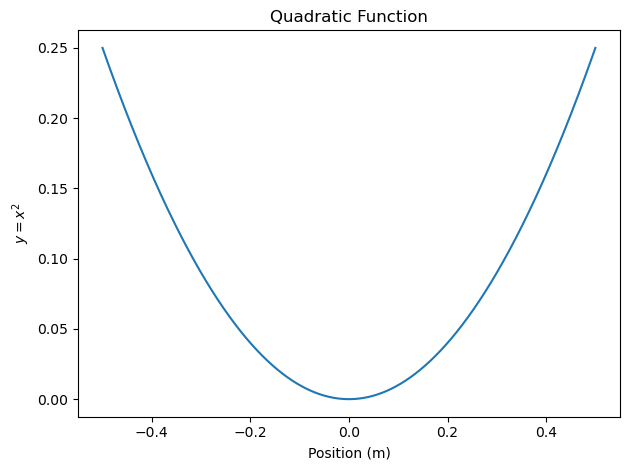

In [7]:
y_quad = x_m**2
plt.plot(x_m, y_quad, color='tab:blue')
plt.xlabel("Position (m)")
plt.ylabel(r"$y = x^2$")
plt.title("Quadratic Function")
plt.tight_layout()
plt.show()

4) Plot a Sinusoid  

* `f` – spatial frequency in cycles / meter.  
* The function is $s(x) = \sin(2\pi f x)$.

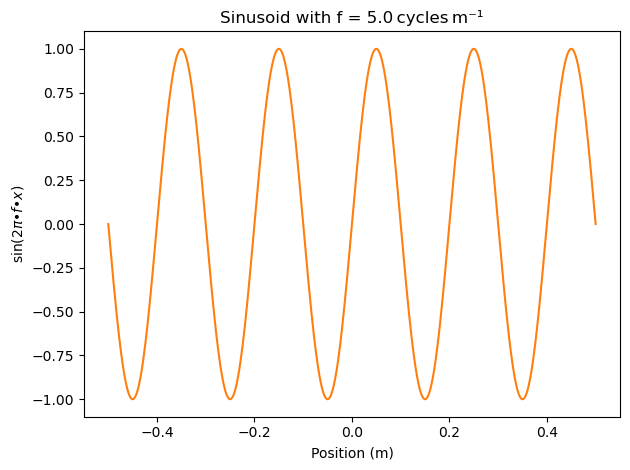

In [11]:
f_pm = 5.0                       # cycles per metre
sine = np.sin(2*np.pi*f_pm*x_m)  # sinusoidal signal
plt.plot(x_m, sine, color='tab:orange')
plt.xlabel("Position (m)")
plt.ylabel(r"$\sin(2\pi•f•x)$")
plt.title(f"Sinusoid with f = {f_pm} cycles m⁻¹")
plt.tight_layout()
plt.show()

5) Plot a Gaussian (Normal) Distribution  
* `x_mean_m` – centre of the Gaussian (m)  
* `x_std_m` – standard deviation (m)  
* The Gaussian is `np.exp(-(x_m - x_mean_m)**2/(2*(x_std_m**2)))`

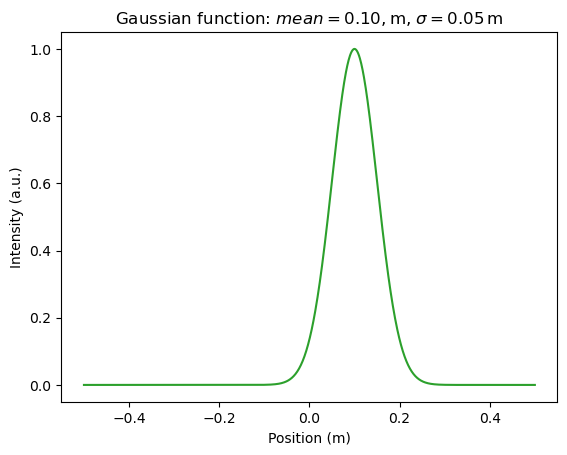

In [22]:
x_mean_m = 0.1 #center of gaussian
x_std_m = 0.05 #width of gaussian
gauss = np.exp(-(x_m - x_mean_m)**2/(2*(x_std_m**2)))
plt.plot(x_m, gauss, color='tab:green')
plt.xlabel("Position (m)")
plt.ylabel("Intensity (a.u.)") 
plt.title("Gaussian function: $mean=0.10,$m, $\sigma=0.05\,$m")
plt.show()

# Note this is the Gaussian function, not an actual distribution 

6) Estimate the Gaussian Parameters from the Sampled Data  
 * **Mean estimate** – weighted average of positions.  
 * **Std‑dev estimate** – square‑root of the weighted variance.

In [18]:
# Normalisation factor (sum of the Gaussian samples)
norm = np.sum(gauss)

# First moment → mean
x_mean_est_m = np.sum(x_m * gauss) / norm
print(f"Estimated mean  = {x_mean_est_m:.5f} m (true = {x_mean_m})")

# Second central moment → variance
x_std_est_m = np.sqrt(np.sum(((x_m - x_mean_est_m)**2) * gauss) / norm)
print(f"Estimated σ    = {x_std_est_m:.5f} m (true = {x_std_m})")

Estimated mean  = 0.10000 m (true = 0.1)
Estimated σ    = 0.05000 m (true = 0.05)


7) Generate Random Samples from a Standard Normal Distribution  
 
* `np.random.randn(N)` draws *N* samples.  
* We visualise the raw series and its histogram.

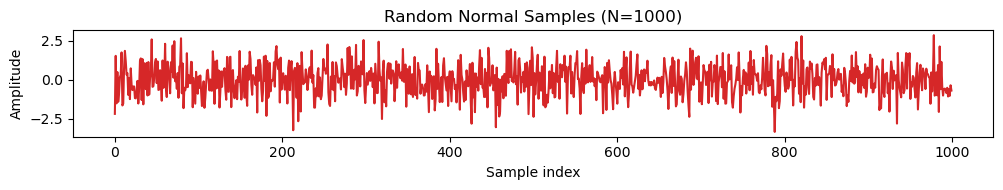

In [21]:
N = 1000
samples = np.random.randn(N)

# For visualisation, plot the raw samples 

plt.figure(figsize=(10, 2))
plt.plot(samples, color='tab:red')
plt.title("Random Normal Samples (N=1000)")
plt.xlabel("Sample index")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

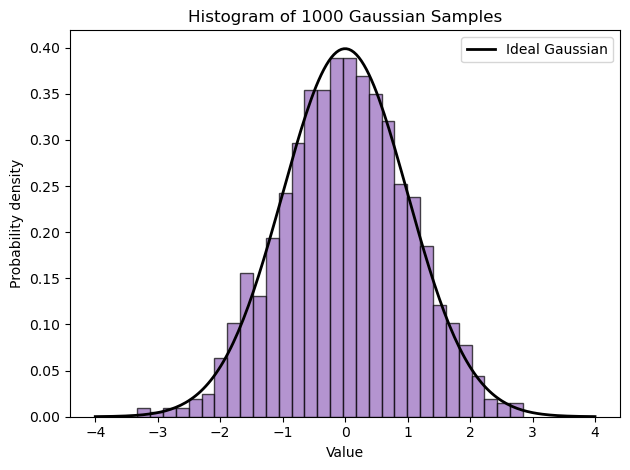

In [27]:
# Histogram – compare with the theoretical Gaussian shape
plt.hist(samples, bins=30, density=True, alpha=0.7,
         color='tab:purple', edgecolor='black')

# Overlay the analytic gaussian for reference
x_m_ideal = np.linspace(-4, 4, 200)
pdf = (1/np.sqrt(2*np.pi)) * np.exp(-x_m_ideal**2 / 2)
plt.plot(x_m_ideal, pdf, color='k', lw=2, label='Ideal Gaussian')
plt.title("Histogram of 1000 Gaussian Samples")
plt.xlabel("Value")
plt.ylabel("Probability density")
plt.legend()
plt.tight_layout()
plt.show()

8) Verify Sample Statistics  

The sample mean should be close to 0 and the sample standard deviation close to 1.

In [28]:
sample_mean = np.mean(samples) 
sample_std = np.std(samples) 

print(f"Sample mean = {sample_mean:.5f} (expected ≈ 0)")
print(f"Sample σ    = {sample_std:.5f} (expected ≈ 1)")

Sample mean = -0.00157 (expected ≈ 0)
Sample σ    = 1.01068 (expected ≈ 1)


Summary  

- Created a uniform spatial grid.  
- Plotted three analytical functions (quadratic, sinusoid, Gaussian).  
- Recovered the Gaussian’s center and width from samples.  
- Generated random samples from a standard normal distribution, confirming that the mean and standard deviation match theoretical expectations.  